In [1]:
import torch
import os
import cv2
import sys
import mmcv
from PIL import Image
# from utils.utils import draw_label_from_infer,get_random_bbox_colors
from matplotlib import pyplot as plt
os.chdir('../')
os.getcwd()


'/home/lijie/project/ITrafficSceneApplication'

In [2]:
from components.detector.objectdetector import Yolov5Detector
from components.detector.base import BaseDetector
detector = Yolov5Detector('cpu')
def infer(detector:BaseDetector,imgs:list):
    imgs_info = [{
        'shape':img.shape
    } for img in imgs]
    input_data = {
        'imgs':imgs,
        'imgs_info':imgs_info
    }
    output = detector(**input_data)
    return output

Fusing layers... 


In [3]:
video = mmcv.VideoReader('./static/data/video/small.mp4')


In [4]:
input_img = video[175]
h,w,c = input_img.shape
h_spilt = h // 2
w_split = w // 3


In [5]:
x = infer(detector,[input_img])


In [8]:
from utils.utils import draw_label_from_infer,get_random_bbox_colors
result = draw_label_from_infer(x,get_random_bbox_colors())

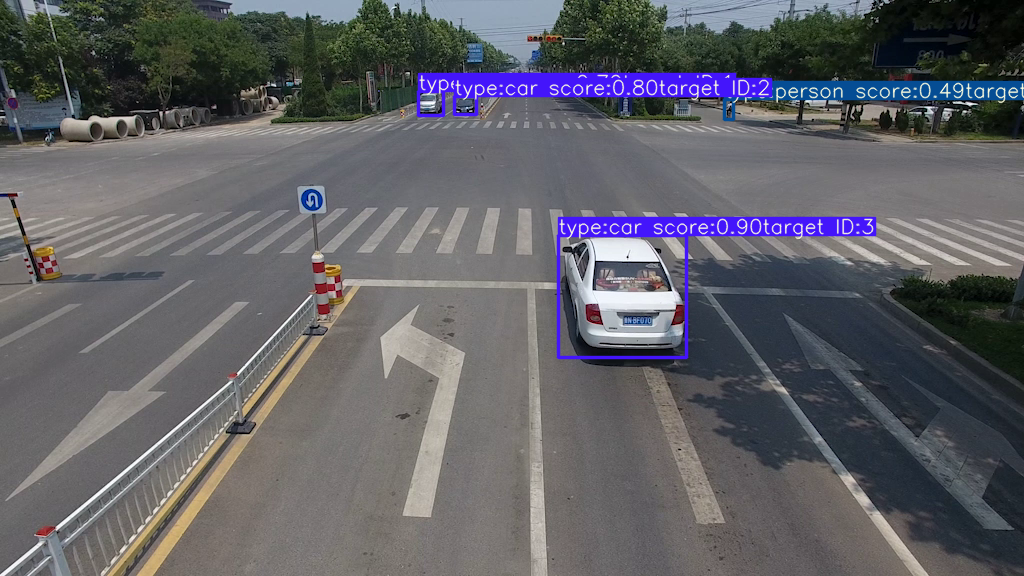

In [12]:
Image.fromarray(mmcv.bgr2rgb(result[0]))

In [9]:
from components.detector.yolov3 import  pad_to_square
import numpy as np
import torchvision.transforms.functional as F
def resize(img,detector_input_size=416):
    # Resize
    img_max_len = max(img.shape[:2])
    img_min_len = min(img.shape[:2])
    scale_num = img_max_len / detector_input_size
    if img.shape[0] == img_max_len:
        target_size = (int(img_min_len/scale_num),detector_input_size)
        img = cv2.resize(img,target_size)
    else:
        target_size = (detector_input_size,int(img_min_len/scale_num))
        img = cv2.resize(img,target_size)
    # Pad to square resolution
    img = F.to_tensor(img)
    # Pad to square resolution
    img, _ = pad_to_square(img, 0)
    img = img.permute((1,2,0)).numpy()
    return img
x =resize(mmcv.bgr2rgb(results[0]))

In [7]:
Image.fromarray(result)

[array([[[ 34,  50,  35],
         [ 29,  45,  30],
         [ 37,  58,  42],
         ...,
         [  0,   4,   0],
         [  2,   6,   1],
         [  3,   7,   2]],
 
        [[ 41,  57,  42],
         [ 27,  43,  28],
         [ 35,  56,  40],
         ...,
         [  3,   7,   2],
         [  1,   5,   0],
         [  0,   3,   0]],
 
        [[ 45,  64,  48],
         [ 39,  58,  42],
         [ 37,  61,  44],
         ...,
         [  1,   5,   0],
         [  1,   5,   0],
         [  0,   4,   0]],
 
        ...,
 
        [[187, 182, 181],
         [231, 226, 225],
         [243, 238, 237],
         ...,
         [ 49,  46,  45],
         [ 59,  56,  55],
         [ 62,  59,  58]],
 
        [[246, 241, 242],
         [250, 245, 246],
         [240, 235, 236],
         ...,
         [ 49,  46,  45],
         [ 56,  53,  52],
         [ 63,  60,  59]],
 
        [[250, 245, 246],
         [245, 240, 241],
         [241, 236, 237],
         ...,
         [ 53,  50,  49],
  